# Table of Contents

1. Load Packages and Clean Dataset 
2. Exploratory Data Analysis 
3. Feature Engineering
4. Pre-Processing
5. Model Construction 
   Logistic Regression
   
  

# 1.) Load Packages and Clean Dataset

In [34]:
# Load Packages
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math

from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.datasets import make_classification
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
import pickle

from sklearn.svm import LinearSVC
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV, train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay, classification_report

In [36]:
# Load dataset
df = pd.read_csv("/Users/vanessalaxamana/Downloads/archive (6)/diabetes_binary_health_indicators_BRFSS2015.csv")

# Confirm the dataset is loaded into the dataframe
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [37]:
# Obtain summary information, check for null values and data types that may need to be changed 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [38]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [39]:
# Get descriptive statistics 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [40]:
# Identify, isolate, and drop rows with duplicates based on any appropriate variable or all together
df.duplicated().sum()

24206

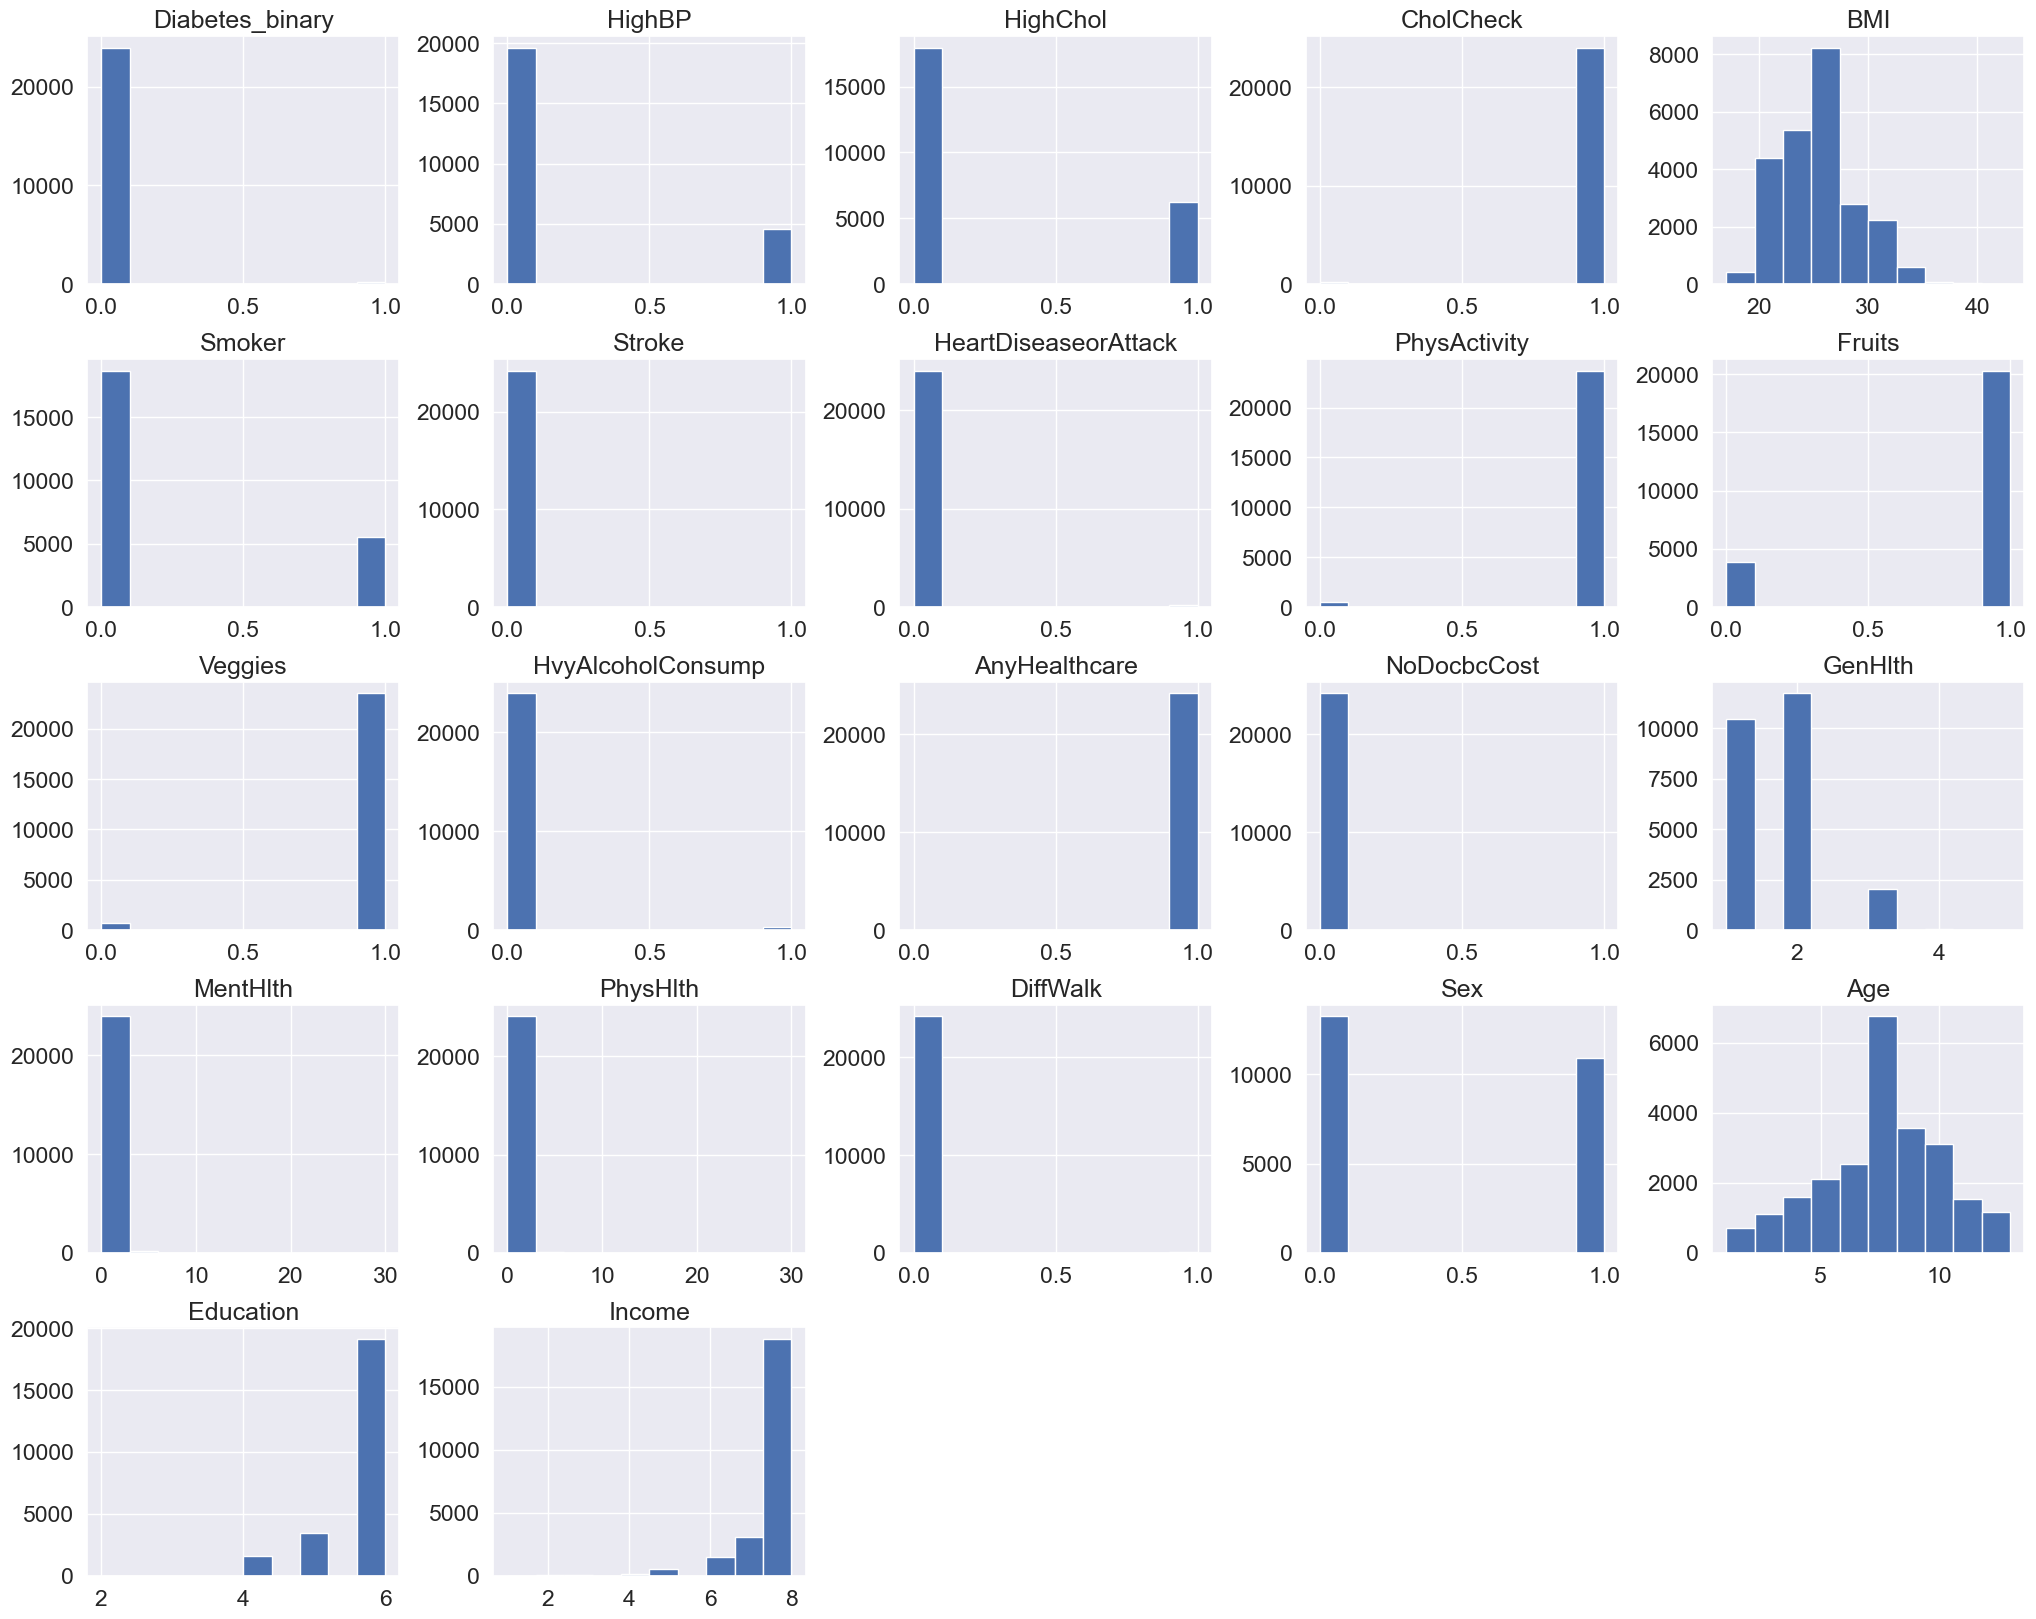

In [41]:
# View the disribution of duplicates to see if the duplication is accidental or normal
duplicate_rows = df[df.duplicated()]

duplicate_rows.hist(figsize=(25,20));

In [42]:
value_counts = duplicate_rows[duplicate_rows['Diabetes_binary'] == 1.0]['Diabetes_binary'].value_counts()
print(value_counts)

1.0    249
Name: Diabetes_binary, dtype: int64


In [43]:
value_counts = duplicate_rows[duplicate_rows['CholCheck'] == 0.0]['Diabetes_binary'].value_counts()
print(value_counts)

0.0    172
Name: Diabetes_binary, dtype: int64


### Data Cleaning Plan:
1.) Dummy encode variables: no
* The data is already dummy encoded for yes/no binary variables


2.) Change other data types: yes
* Change all floats to ints for computational speed

3.) Remove null values: no
* There appears to be no null values in the dataset.

4.) Remove or restructure outliers: no
* Since most variables are categorical or yes/no, the dataset is formatted to prevent outliers.

5.) Remove duplicates: no
* I chose not to remove the duplicates because these duplicates could show patterns in the data and distribution. It does not appear that the cause of duplication is an error. If removed, the accuracy of the models could decrease


In [44]:
# Change all floats to ints
df["Diabetes_binary"] = df["Diabetes_binary"].astype(int)
df["HighBP"] = df["HighBP"].astype(int)
df["HighChol"] = df["HighChol"].astype(int)
df["CholCheck"] = df["CholCheck"].astype(int)
df["BMI"] = df["BMI"].astype(int)
df["Smoker"] = df["Smoker"].astype(int)
df["Stroke"] = df["Stroke"].astype(int)
df["HeartDiseaseorAttack"] = df["HeartDiseaseorAttack"].astype(int)
df["PhysActivity"] = df["PhysActivity"].astype(int)
df["Fruits"] = df["Fruits"].astype(int) 
df["Veggies"] = df["Veggies"].astype(int)
df["HvyAlcoholConsump"] = df["HvyAlcoholConsump"].astype(int)
df["AnyHealthcare"] = df["AnyHealthcare"].astype(int)
df["NoDocbcCost"] = df["NoDocbcCost"].astype(int)
df["GenHlth"] = df["GenHlth"].astype(int)
df["MentHlth"] = df["MentHlth"].astype(int)
df["PhysHlth"] = df["PhysHlth"].astype(int)
df["DiffWalk"] = df["DiffWalk"].astype(int)
df["Sex"] = df["Sex"].astype(int)
df["Age"] = df["Age"].astype(int)
df["Education"] = df["Education"].astype(int)
df["Income"] =df["Income"].astype(int)

In [45]:
# Confirm all data types have been changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

***

***

# 2.) Perform EDA

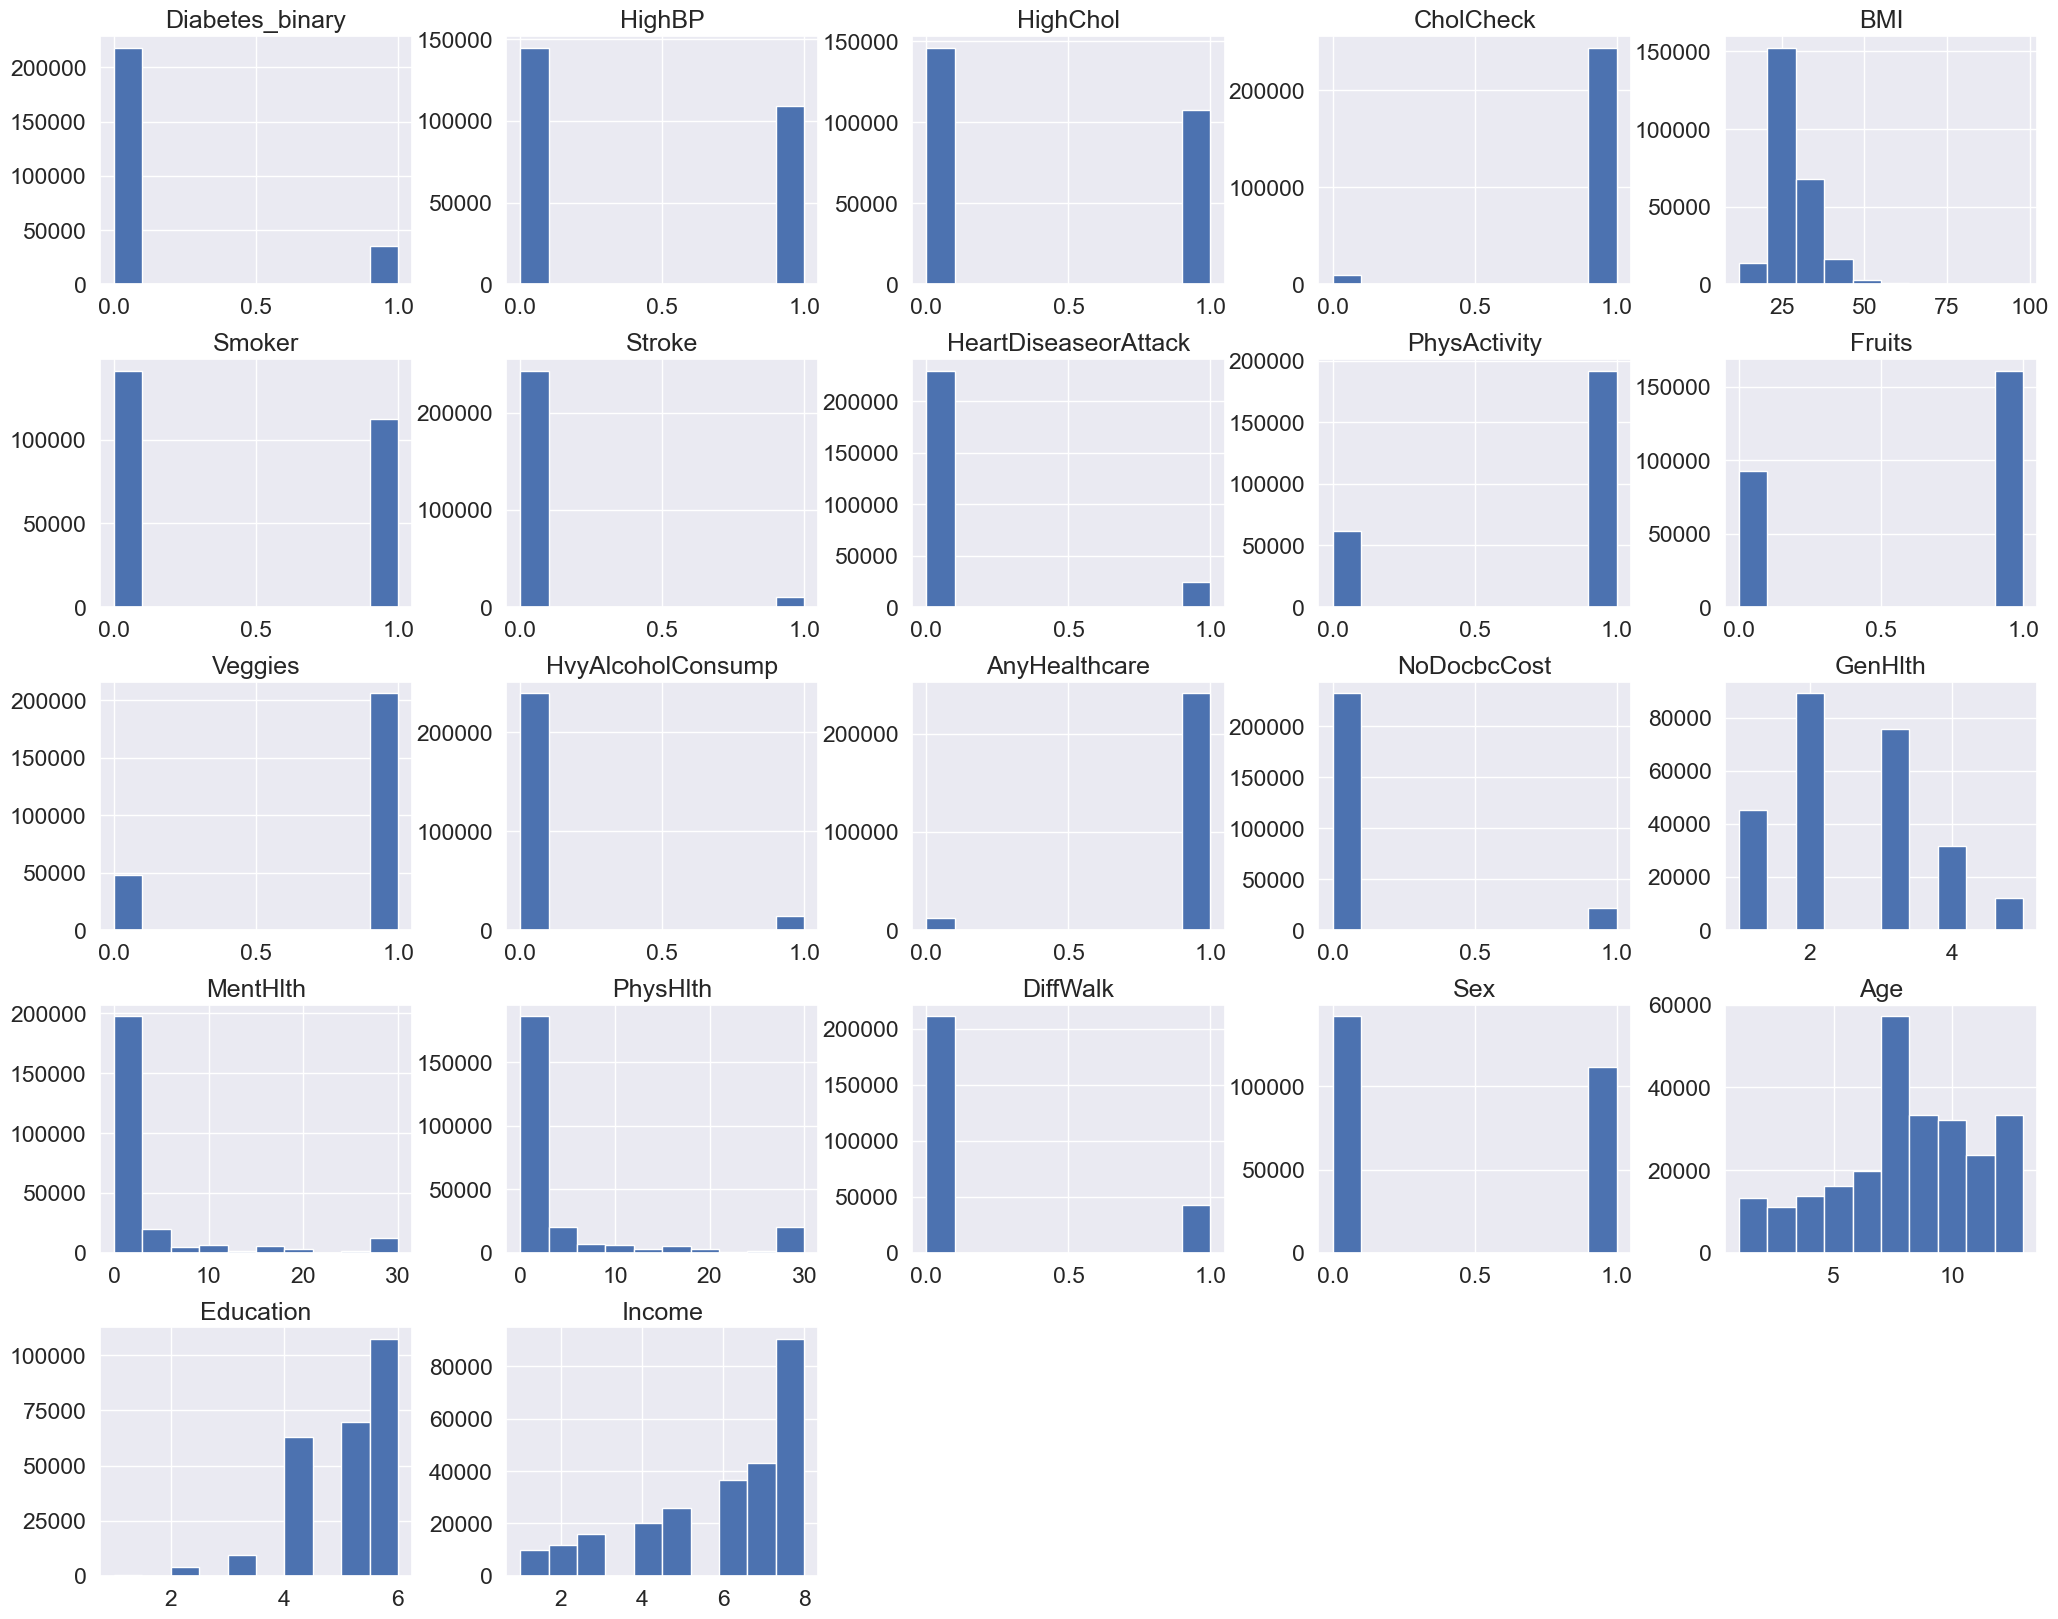

In [46]:
# Visual representation of value counts
df.hist(figsize=(25,20));

Text(0.5, 1.0, 'Diabetes Variable Correlations')

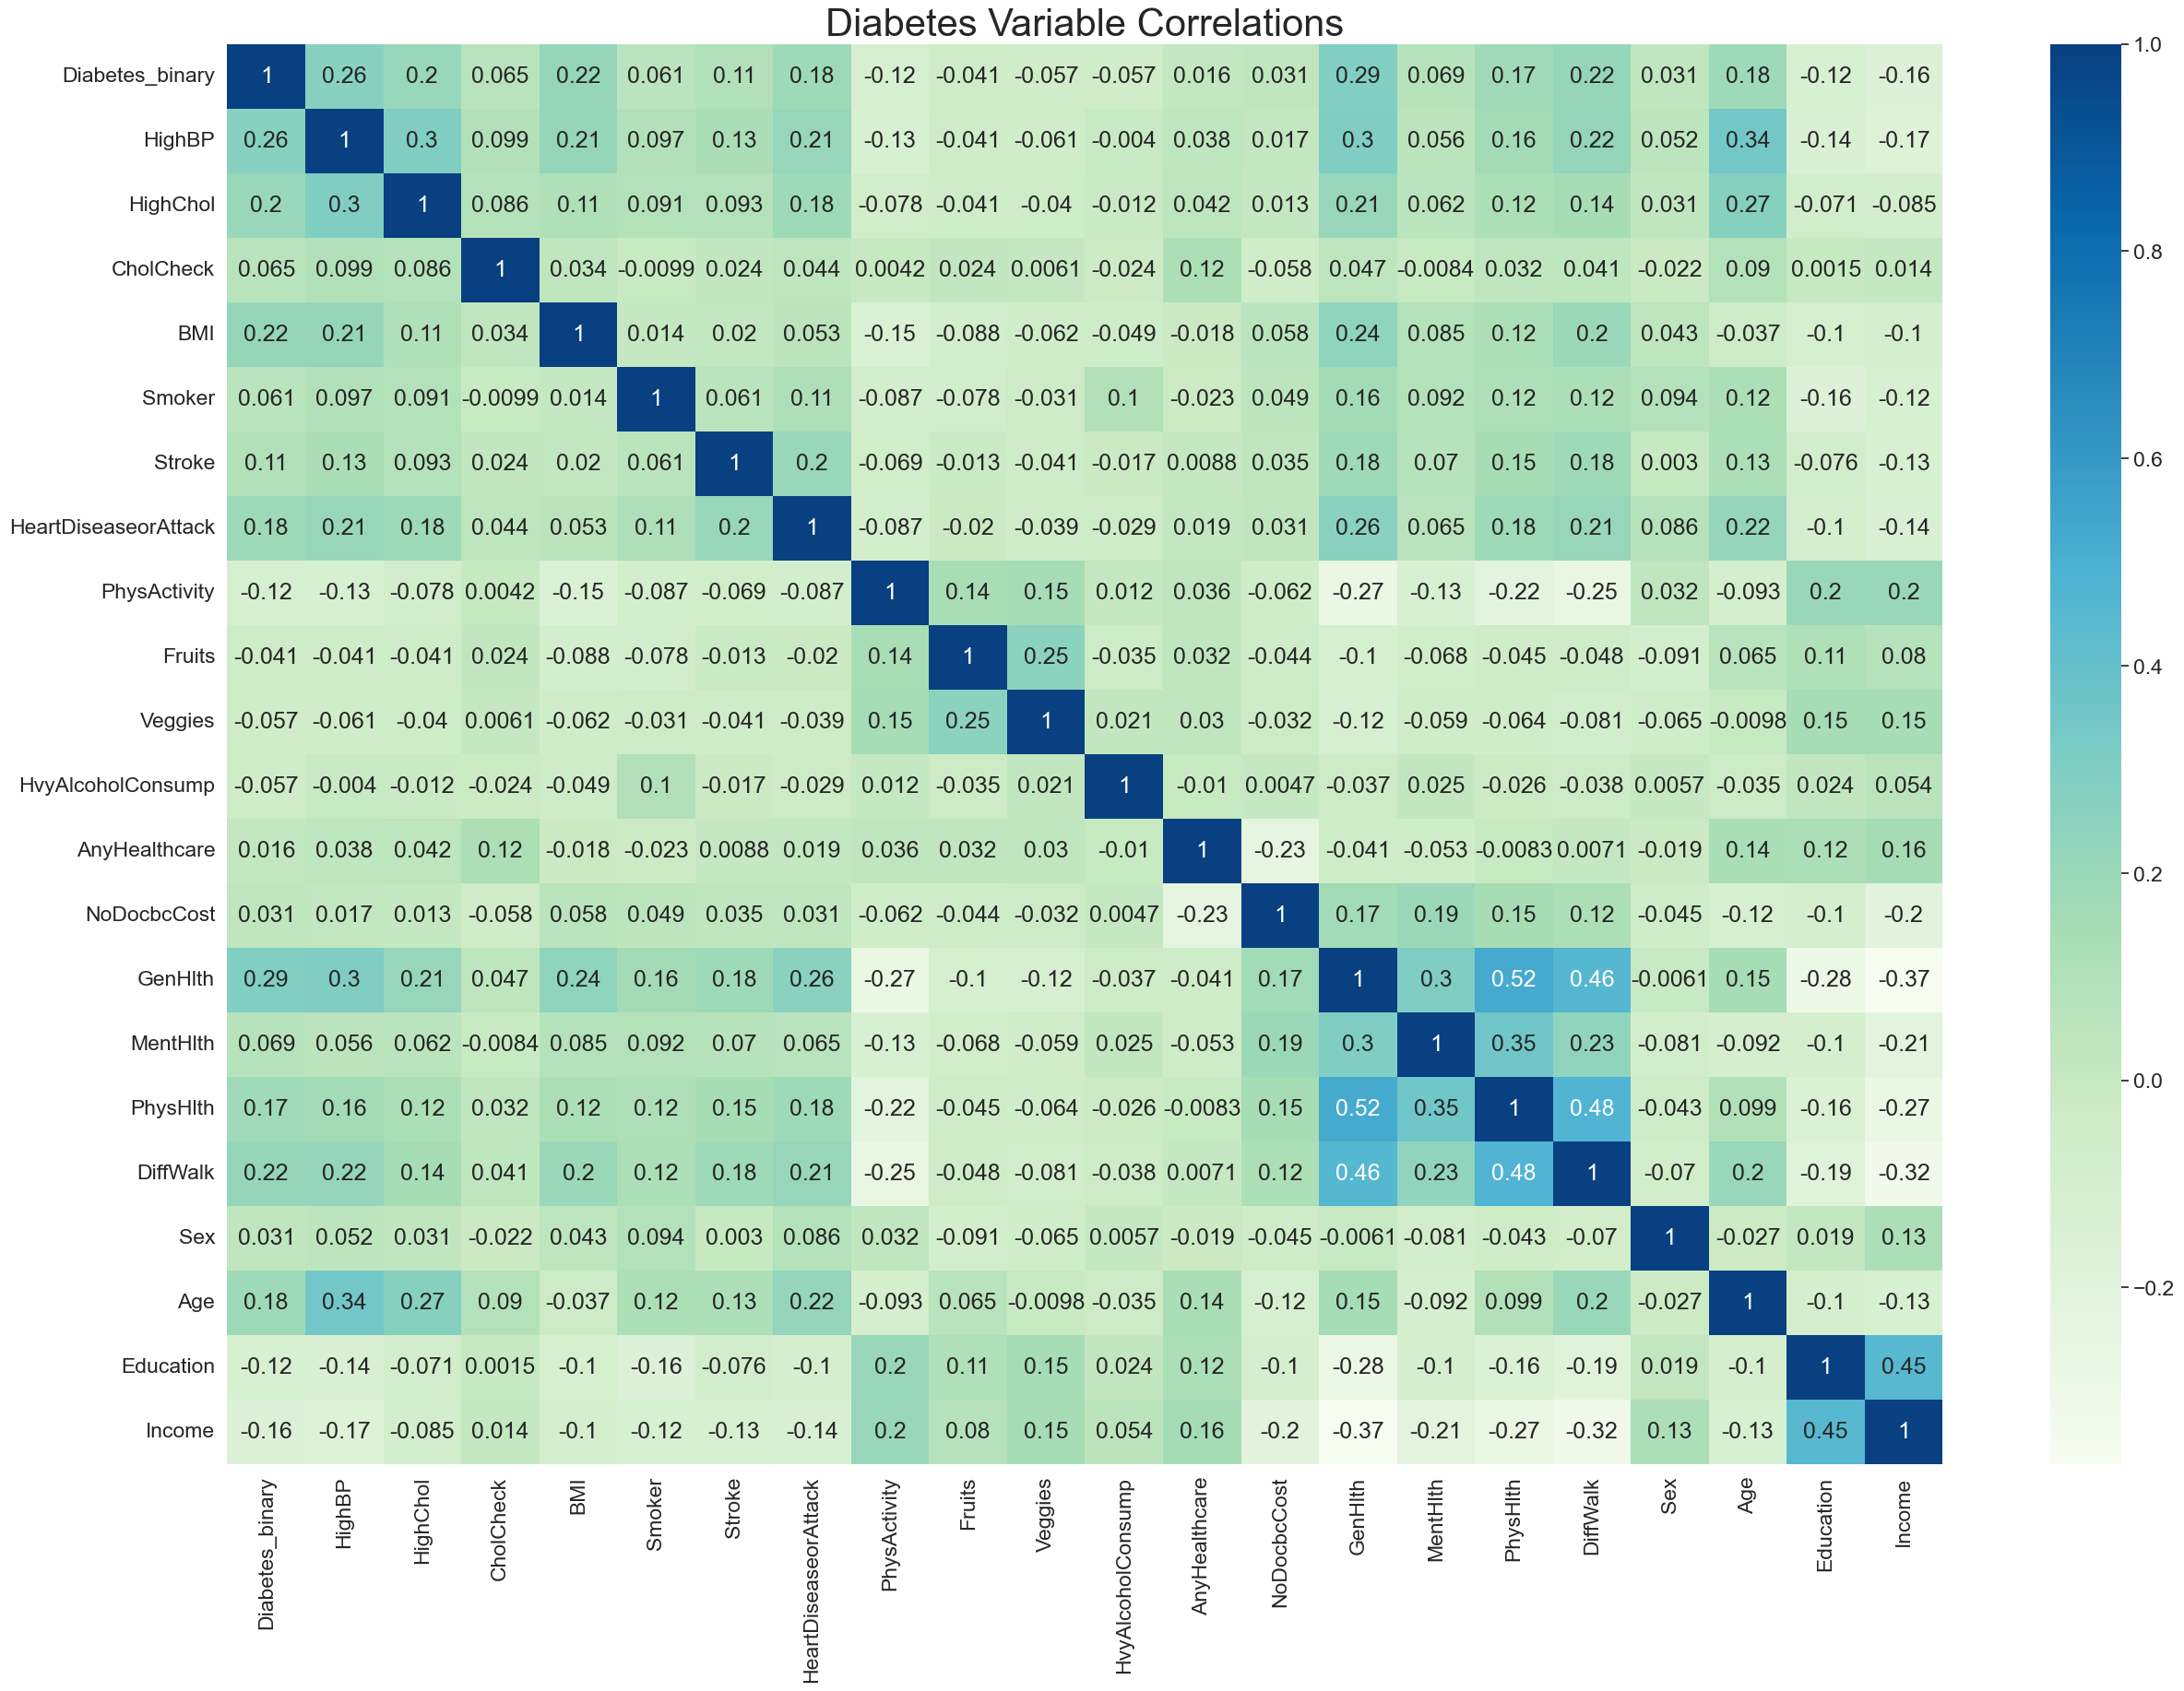

In [47]:
# Check correlation using a heatmap
plt.figure(figsize = (30,20))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(),annot=True, cmap='GnBu')
plt.title("Diabetes Variable Correlations",fontsize=30)

<Axes: title={'center': 'Correlation with Diabetes_binary'}>

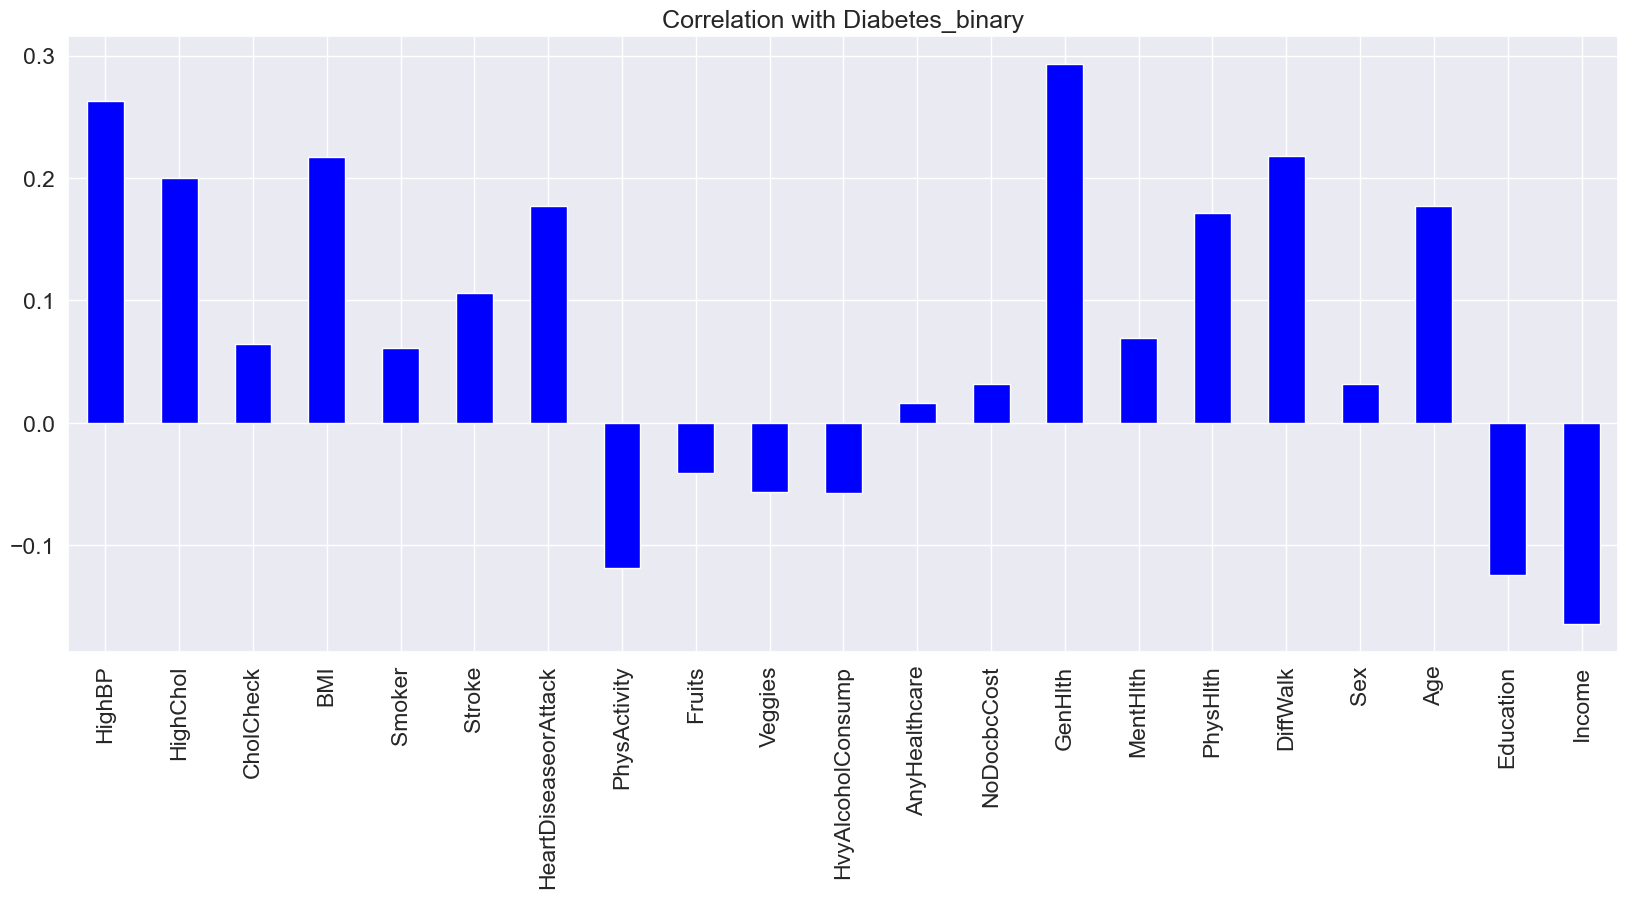

In [48]:
df.drop('Diabetes_binary', axis=1).corrwith(df.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Diabetes_binary",color="Blue")

Noteable Correlations:
* Lowest: fruits, veggies, anyhealthcare, nodocbccost, sex(important!)
* Highest: highBP, highchol, highBMI, genhealth, physhealth, diffwalk

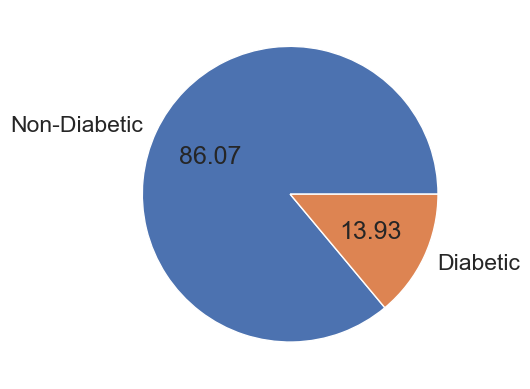

In [49]:
# Obtain value counts of patients with diabetes
labels=["Non-Diabetic","Diabetic"]
plt.pie(df["Diabetes_binary"].value_counts(), labels =labels ,autopct='%.02f');

***

# 3.) Feature Engineering
We will automate selection using ANOVA

In [50]:
# drop str variables (categorial variables) to prevent errors in ANOVA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [51]:
# Import necessary libraries
from sklearn.feature_selection import SelectKBest, f_classif

# Split the columns and designate Diabetes_binary as Y
X = df.iloc[:, 1:]
Y = df.iloc[:, 0]

# Define feature selection with f_classif
fs = SelectKBest(score_func=f_classif, k=13)

# Apply feature selection
X_selected = fs.fit_transform(X, Y)

# Print the shape of the selected features
print(X_selected.shape)


(253680, 13)


In [52]:
from sklearn.feature_selection import chi2

In [53]:
pd.DataFrame(X_selected).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,1,40,0,0,0,5,18,15,1,9,4,3
1,0,0,25,0,0,1,3,0,0,0,7,6,1
2,1,1,28,0,0,0,5,30,30,1,9,4,8
3,1,0,27,0,0,1,2,0,0,0,11,3,6
4,1,1,24,0,0,1,2,3,0,0,11,5,4


In [54]:
# Conduct a chi2 to utilize SelectKBest to extract the top 10 features
BestFeatures = SelectKBest(score_func=chi2, k=13)
fit = BestFeatures.fit(X,Y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

#concatenating two dataframes for better visualization
f_Scores = pd.concat([df_columns,df_scores],axis=1)
f_Scores.columns = ['Feature','Score']

n=f_Scores.shape[0]

print(n)
f_Scores.sort_values(by=['Score']).iloc[n:7:-1]

21


,Feature,Score
15,PhysHlth,133424.406534
14,MentHlth,21029.632228
3,BMI,18355.166400
16,DiffWalk,10059.506391
0,HighBP,10029.013935
13,GenHlth,9938.507776
18,Age,9276.141199
6,HeartDiseaseorAttack,7221.975378
1,HighChol,5859.710582
20,Income,4829.816361


***

***

# 5.) Pre-Processing and Hyperparameter Tuning

### Since we have a few features with different ranges, we will perform normalization. 

In regression, standardization improves stability and may speed up the training process


In [55]:
# Choose columns for model based on correlation matrix 
df_model = df[['Diabetes_binary', 'HighBP','HighChol', 'BMI', 'GenHlth', 
               'DiffWalk', 'Age', 'HeartDiseaseorAttack', 'PhysHlth','MentHlth','Stroke','PhysActivity','HvyAlcoholConsump']]

In [56]:
# Train test split
x = df_model.drop('Diabetes_binary', axis=1)
y = df_model['Diabetes_binary']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [57]:
# Drop unnecessary columns
unused_colomns = ['Fruits', 'Veggies', 'Sex', 'CholCheck', 'AnyHealthcare','Education','Smoker','NoDocbcCost']
df.drop(columns=unused_colomns, axis=1,inplace=True)

In [58]:
# Confirm column drop
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Stroke                253680 non-null  int64
 5   HeartDiseaseorAttack  253680 non-null  int64
 6   PhysActivity          253680 non-null  int64
 7   HvyAlcoholConsump     253680 non-null  int64
 8   GenHlth               253680 non-null  int64
 9   MentHlth              253680 non-null  int64
 10  PhysHlth              253680 non-null  int64
 11  DiffWalk              253680 non-null  int64
 12  Age                   253680 non-null  int64
 13  Income                253680 non-null  int64
dtypes: int64(14)
memory usage: 27.1 MB


In [59]:
# split data
X=df.drop('Diabetes_binary',axis=1)
Y=df['Diabetes_binary']

In [60]:
Y.value_counts()

0    218334
1     35346
Name: Diabetes_binary, dtype: int64

 Result: There is a large class imbalance in the dataset

In [61]:
# Split training and testing data
X_train , X_test , Y_train , Y_test = train_test_split(X,Y, test_size=0.3 , random_state=42)

In [62]:
# Verify the number of samples in the partitioned data
for x in [X_train, X_test, Y_train, Y_test]:
    print(len(x))

177576
76104
177576
76104


## D.) Logistic Regression

In [63]:
# First, perform normalization
means= np.mean(X_train, axis=0)
stds= np.std(X_train, axis=0)

X_train = (X_train - means)/stds
X_test = (X_test - means)/stds

In [64]:
# Fit the model on the training data
lg=LogisticRegression(C=1.0, random_state=42)
lg.fit(X_train,Y_train)

LogisticRegression(random_state=42)

In [65]:
# make initial predictions on test data and make the result 4 decimal places
y_pred=lg.predict(X_test)
print('Training set score: {:.4f}'.format(lg.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(lg.score(X_test, Y_test)))

Training set score: 0.8625
Test set score: 0.8648


In [66]:
# check MSE & RMSE
mse=mean_squared_error(Y_test,y_pred)
print('Mean Squared Error : '+str(mse))

rmse=math.sqrt(mse)
print('Root Mean Squared Error : '+str(rmse))

Mean Squared Error : 0.13520971302428256
Root Mean Squared Error : 0.36770873395159187


Mean squared error=how close the data points are to the regression line

In [67]:
matrix = classification_report(Y_test,y_pred)
print(matrix)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93     65605
           1       0.53      0.15      0.24     10499

    accuracy                           0.86     76104
   macro avg       0.71      0.57      0.58     76104
weighted avg       0.83      0.86      0.83     76104



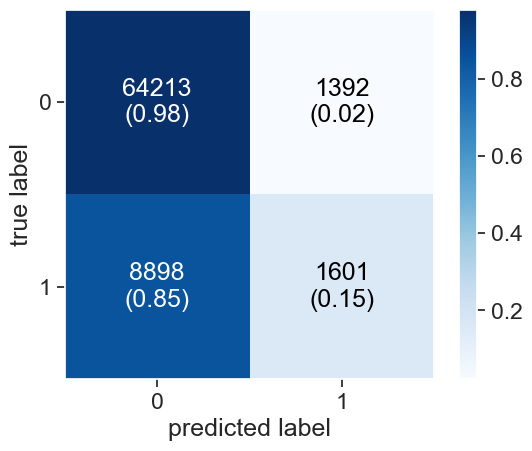

In [68]:
# calculating the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,show_normed=True, colorbar=True)
plt.show()

In [72]:
#calculate K Fold cross validation 

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import math

k = 5  # Define the number of folds


kf = KFold(n_splits=k, random_state=42, shuffle=True)

scores = []
mses = []
rmses = []

for train_index, val_index in kf.split(X):
    # Split the data into training and validation sets using iloc for integer-location based indexing
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    Y_train, Y_val = Y.iloc[train_index], Y.iloc[val_index]
    
    # Normalize the training and validation data
    means = np.mean(X_train, axis=0)
    stds = np.std(X_train, axis=0)
    X_train_normalized = (X_train - means) / stds
    X_val_normalized = (X_val - means) / stds
    
    # Fit the model on the normalized training data
    lg = LogisticRegression(C=1.0, random_state=42)
    lg.fit(X_train_normalized, Y_train)
    
    # Make predictions on the normalized validation data
    y_pred = lg.predict(X_val_normalized)
    
    # Calculate the score, MSE, and RMSE for the validation set
    score = lg.score(X_val_normalized, Y_val)
    mse = mean_squared_error(Y_val, y_pred)
    rmse = math.sqrt(mse)
    
    # Store the results
    scores.append(score)
    mses.append(mse)
    rmses.append(rmse)

# Calculate the average score, MSE, and RMSE across all folds
avg_score = np.mean(scores)
avg_mse = np.mean(mses)
avg_rmse = np.mean(rmses)

print(f'Average score across all folds: {avg_score:.4f}')
print(f'Average Mean Squared Error across all folds: {avg_mse:.4f}')
print(f'Average Root Mean Squared Error across all folds: {avg_rmse:.4f}')


Average score across all folds: 0.8632
Average Mean Squared Error across all folds: 0.1368
Average Root Mean Squared Error across all folds: 0.3698
